In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supply_chain_data_cleaned.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Risk Score,Risk Score(perct.),EOQ(economic order quantity),Order quantities(Repeated)
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,46.279879,Pending,0.226410,Road,Route B,187.752075,0.941820,94%,43,96
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,33.616769,Pending,4.854068,Road,Route B,503.065579,2.522460,252%,71,37
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,30.688019,Pending,4.580593,Air,Route C,141.920282,0.756771,76%,38,88
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,35.624741,Fail,4.746649,Rail,Route A,254.776159,1.280012,128%,50,59
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,92.065161,Fail,3.145580,Air,Route A,923.440632,4.624387,462%,96,56


In [3]:
risk_data = df.sort_values(by='Risk Score', ascending=False)[:10]
risk_data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Risk Score,Risk Score(perct.),EOQ(economic order quantity),Order quantities(Repeated)
76,haircare,SKU76,69.108800,23,241,5328.375984,Male,38,1,22,...,64.323598,Pending,2.180037,Rail,Route A,997.413450,4.999005,500%,100,22
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,47.957602,Pending,3.844614,Rail,Route B,995.929462,4.985887,499%,100,83
91,cosmetics,SKU91,62.111965,90,916,1935.206794,Male,98,22,85,...,39.772883,Pending,0.626002,Rail,Route B,996.778315,4.984544,498%,100,85
90,skincare,SKU90,13.881913,56,320,9592.633570,Non-binary,66,18,96,...,85.675963,Pass,1.219382,Rail,Route B,990.078472,4.951410,495%,100,96
14,skincare,SKU14,99.171329,26,562,8653.570926,Non-binary,54,29,78,...,5.791437,Pending,0.100683,Air,Route B,929.235290,4.649400,465%,96,78
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,92.065161,Fail,3.145580,Air,Route A,923.440632,4.624387,462%,96,56
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,5.604691,Pending,2.908122,Rail,Route A,882.198864,4.421913,442%,94,27
87,haircare,SKU87,80.414037,24,79,5133.846701,Male,5,7,55,...,28.696997,Fail,3.693738,Sea,Route B,879.359218,4.409093,441%,94,55
30,haircare,SKU30,8.022859,10,327,2766.342367,Male,60,26,35,...,51.634893,Pending,0.965395,Road,Route C,880.080988,4.408280,441%,94,35
75,skincare,SKU75,92.996884,29,106,1889.073590,Non-binary,16,20,56,...,48.064783,Pass,2.030069,Air,Route C,873.129648,4.371381,437%,93,56


In [4]:
fig = px.bar(risk_data, x='SKU', y='Risk Score', title='Top 10 Highest-Risk Data',
             labels={'Risk Score': 'Risk Score', 'SKU': 'SKU'},
             text='Risk Score')

In [5]:
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='SKU', yaxis_title='Risk Score', title_x=0.5)


## EOQ


In [6]:
comparison_columns = df[['SKU', 'EOQ(economic order quantity)','Order quantities']]
comparison_columns.head()

,SKU,EOQ(economic order quantity),Order quantities
0,SKU0,43,96
1,SKU1,71,37
2,SKU2,38,88
3,SKU3,50,59
4,SKU4,96,56


In [7]:
top_10_comparison = comparison_columns.head(10)

In [8]:
fig = px.bar(top_10_comparison, x='SKU', y=['EOQ(economic order quantity)', 'Order quantities'],
             title='Comparison of EOQ and Order Quantities for Top 10 SKUs')

fig.update_layout(
    title_x=0.5
)


In [9]:
avg_lead_times_transport = df.groupby(['Transportation modes'])['Lead times'].mean().reset_index()

fig = px.bar(avg_lead_times_transport, x='Transportation modes', y='Lead times',
             labels={'Transportation modes': 'Transportation Mode', 'Lead times': 'Average Lead Time'},
             title='Average Lead Times by Transportation Mode')

In [10]:
color_scale = px.colors.qualitative.Set3  # You can choose a different color scale
fig.update_traces(marker_color=color_scale)
fig.update_layout(
    title=dict(text='Average Lead Times by Transportation Mode', x=0.5),
    xaxis_title='Transportation Mode',
    yaxis_title='Average Lead Time',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    font=dict(family="Arial", size=14),
    showlegend=False  # Remove legend
)

In [11]:
best_transportation_mode = avg_lead_times_transport.loc[avg_lead_times_transport['Lead times'].idxmin()]
best_transportation_mode

,3
Transportation modes,Sea
Lead times,12.176471


In [12]:
avg_lead_times_route = df.groupby(['Routes'])['Lead times'].mean().reset_index()
best_route = avg_lead_times_route.loc[avg_lead_times_route['Lead times'].idxmin()]
best_route_data = df[df['Routes']==best_route['Routes']]
best_route_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Risk Score,Risk Score(perct.),EOQ(economic order quantity),Order quantities(Repeated)
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,35.624741,Fail,4.746649,Rail,Route A,254.776159,1.280012,128%,50,59
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,92.065161,Fail,3.145580,Air,Route A,923.440632,4.624387,462%,96,56
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,56.766476,Fail,2.779194,Road,Route A,235.461237,1.179130,118%,49,66
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,1.085069,Pending,1.000911,Sea,Route A,134.369097,0.675169,68%,37,58
11,skincare,SKU11,90.635460,95,960,6099.944116,Female,46,23,60,...,27.592363,Pending,0.021170,Air,Route A,126.723033,0.638286,64%,36,60


In [19]:
numerical_cols = df.select_dtypes(include='number').columns

palette = sns.color_palette("viridis", n_colors=len(numerical_cols))
statistics = {}
for column in numerical_cols:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().values[0]
    statistics[column] = {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }
statistics_df = pd.DataFrame(statistics).T
statistics_df.reset_index(inplace=True)
statistics_df.columns = ['Column', 'Mean', 'Median', 'Mode']
statistics_df.head()

,Column,Mean,Median,Mode
0,Price,49.462461,51.239830,1.699976
1,Availability,48.400000,43.500000,11.000000
2,Number of products sold,460.990000,392.500000,134.000000
3,Revenue generated,5776.048187,6006.352023,1061.618523
4,Stock levels,47.770000,47.500000,5.000000


In [13]:
revenue_avg_by_demo_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].mean().reset_index()
revenue_sum_by_demo_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].sum().reset_index()

In [14]:
revenue_avg_by_demo_prod

,Customer demographics,Product type,Revenue generated
0,Female,cosmetics,6954.854220
1,Female,haircare,6362.416641
2,Female,skincare,6095.470280
3,Male,cosmetics,5347.741374
4,Male,haircare,5059.992731
5,Male,skincare,7806.214493
6,Non-binary,cosmetics,5247.096332
7,Non-binary,haircare,5567.306726
8,Non-binary,skincare,4650.833888
9,Unknown,cosmetics,6335.182378


In [15]:
colors = px.colors.qualitative.Set3
fig = make_subplots(rows=1, cols=2, subplot_titles=('Average Revenue', 'Total Revenue'))
for i, product_type in enumerate(revenue_avg_by_demo_prod['Product type'].unique()):
    subset = revenue_avg_by_demo_prod[revenue_avg_by_demo_prod['Product type'] == product_type]
    fig.add_trace(
        go.Bar(
            x=subset['Customer demographics'],
            y=subset['Revenue generated'],
            name=product_type,
            marker_color=colors[i]
        ),
        row=1, col=1
    )
    for i, product_type in enumerate(revenue_sum_by_demo_prod['Product type'].unique()):
        subset = revenue_sum_by_demo_prod[revenue_sum_by_demo_prod['Product type'] == product_type]
        fig.add_trace(
            go.Bar(
                x=subset['Customer demographics'],
                y=subset['Revenue generated'],
                showlegend=False,  # Hide legend for this subplot
                marker_color=colors[i]
            ),
            row=1, col=2
        )
    fig.update_layout(
    title='Revenue Analysis by Customer Demographics and Product Type',
    xaxis=dict(title='Customer Demographics'),
    yaxis=dict(title='Revenue'),
    xaxis2=dict(title='Customer Demographics'),
    yaxis2=dict(title='Revenue'),
    title_x=0.5,
    showlegend=True  # Show legend for the first subplot
)

In [16]:
fig.show()

<ipython-input-17-0ea1be31e138>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




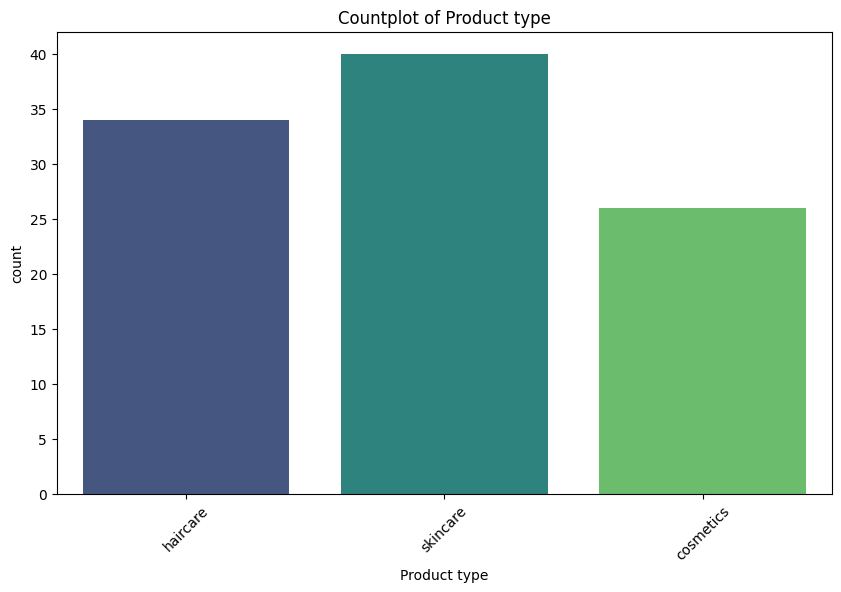

<ipython-input-17-0ea1be31e138>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




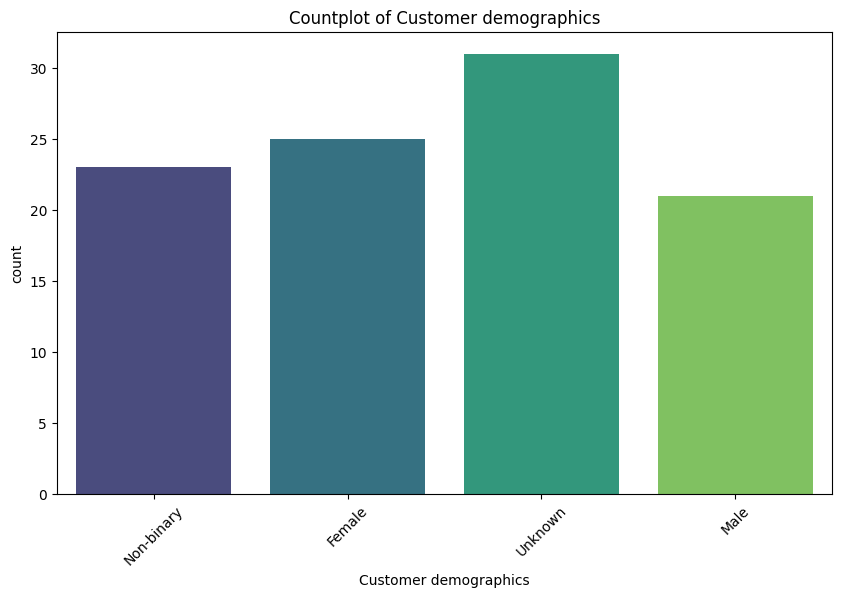

<ipython-input-17-0ea1be31e138>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




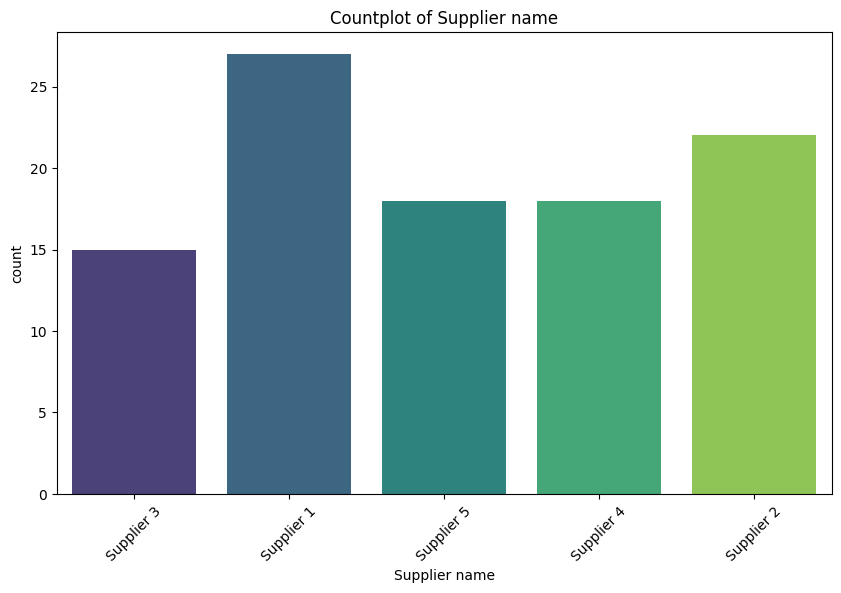

<ipython-input-17-0ea1be31e138>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




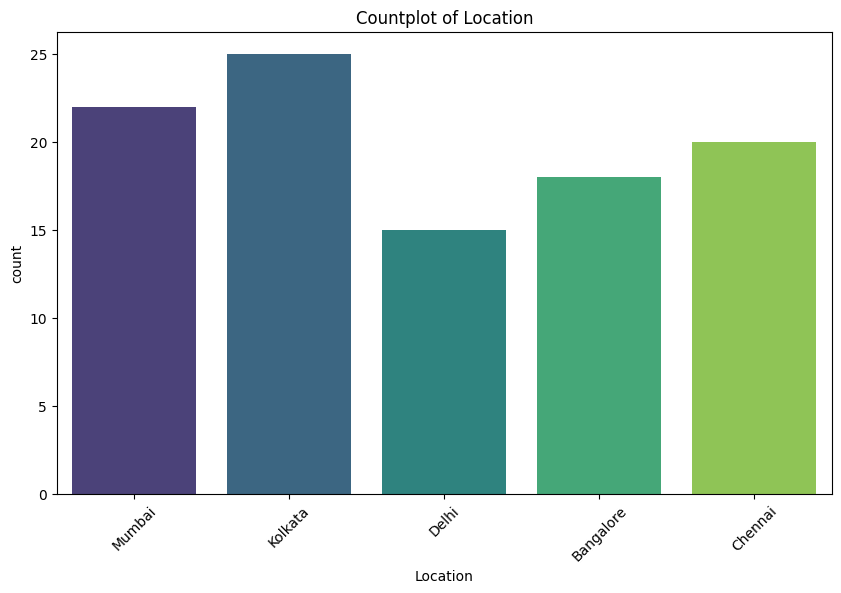

<ipython-input-17-0ea1be31e138>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




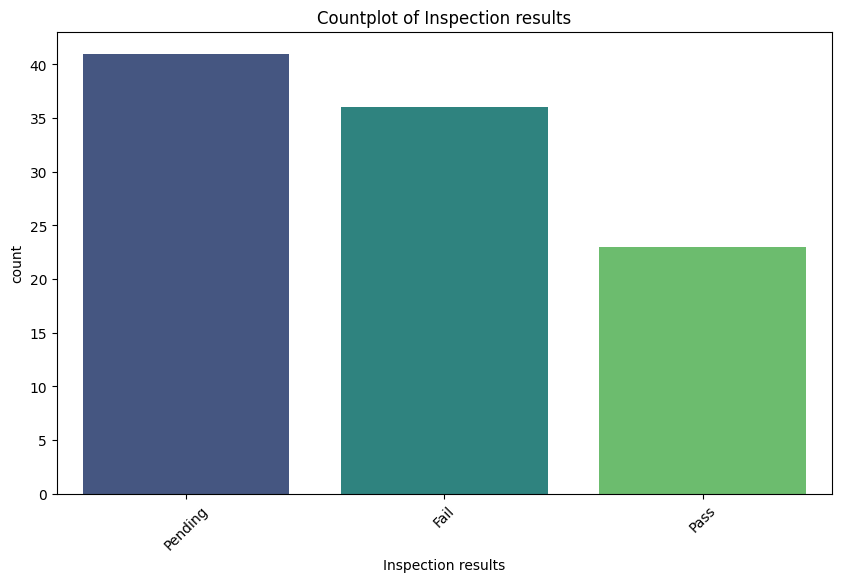

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols
categorical_cols = categorical_cols.drop(['SKU', 'Routes','Shipping carriers','Transportation modes','Risk Score(perct.)'])

for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [27]:

# Assuming SC is a pandas DataFrame already defined
fig_productssold_bytype_loc = px.scatter(
    df,
    x='Availability',
    y='Number of products sold',
    color='Product type',
    color_discrete_sequence=px.colors.sequential.Magma,
    size='Number of products sold',
    title='Availability vs Number of Products Sold by Product Type',
    labels={
        'Availability': 'Availability',
        'Number of products sold': 'Number of Products Sold'
    },
    hover_data=['Product type']
)

# Show the plot
fig_productssold_bytype_loc.show()

In [18]:
defect_rates_by_product = df.groupby("Product type")['Defect rates'].mean().reset_index()
fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates', title='Defect Rates by Product Type')
color_scale = px.colors.qualitative.Pastel  # You can choose a different color scale
fig.update_traces(marker_color=color_scale)
fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Mean Defect Rates",
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(title='Mean Defect Rates'),
    plot_bgcolor='white',
    title_x=0.5,
    showlegend=True  # Hide the legend
)
fig.show()